<a href="https://colab.research.google.com/github/tejasree-k90/Cluster-Clash-Compare-Safe-Moderate-and-Risky-Stocks/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('merged_data.csv')
print(data.head())  # View first 5 rows  # Number of rows and columns

         Date Symbol       Close        High         Low        Open  \
0  02-01-2024      A  137.793884  139.621201  136.959676  137.237746   
1  02-01-2024   AAPL  184.532074  187.315366  182.792518  186.033057   
2  02-01-2024   ABBV  152.743393  153.049216  147.916997  148.041231   
3  02-01-2024   ABNB  134.479996  135.600006  133.339996  134.429993   
4  02-01-2024    ABT  107.138481  108.260096  106.855639  106.855639   

       Volume             Full Name             GICS Sector  \
0   1441600.0  Agilent Technologies             Health Care   
1  82488700.0            Apple Inc.  Information Technology   
2   8059900.0                AbbVie             Health Care   
3   3485200.0                Airbnb  Consumer Discretionary   
4   5058600.0   Abbott Laboratories             Health Care   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.14         6.23   
1  Technology Hardware, Stor

In [4]:
print(data.info())  # Check column names, data types, and non-null counts
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53492 entries, 0 to 53491
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                53492 non-null  object 
 1   Symbol              53492 non-null  object 
 2   Close               53492 non-null  float64
 3   High                53491 non-null  float64
 4   Low                 53491 non-null  float64
 5   Open                53491 non-null  float64
 6   Volume              53491 non-null  float64
 7   Full Name           53491 non-null  object 
 8   GICS Sector         53491 non-null  object 
 9   GICS Sub-Industry   53491 non-null  object 
 10  environmentScore    53491 non-null  float64
 11  socialScore         53491 non-null  float64
 12  governanceScore     53491 non-null  float64
 13  totalEsg            53491 non-null  float64
 14  highestControversy  53491 non-null  float64
 15  ratingYear          53491 non-null  float64
 16  rati

In [5]:
print(data.describe())

              Close          High           Low          Open        Volume  \
count  53492.000000  53491.000000  53491.000000  53491.000000  5.349100e+04   
mean     197.025546    198.973176    195.006342    197.036915  5.874480e+06   
std      426.002780    430.355085    421.723684    426.017000  2.542969e+07   
min        1.000000      7.780000      7.340000      7.350000  9.800000e+03   
25%       61.618953     62.259112     60.911321     61.564997  1.031750e+06   
50%      117.024998    118.320906    115.809893    117.055207  2.084200e+06   
75%      213.129013    215.412883    210.881474    213.330908  4.737150e+06   
max     8099.959961   8211.400391   8010.000000   8097.979980  1.142269e+09   

       environmentScore   socialScore  governanceScore      totalEsg  \
count      53491.000000  53491.000000     53491.000000  53491.000000   
mean           5.931737      9.100270         5.545060     20.577149   
std            5.097408      3.600007         2.227858      6.664962   


In [6]:
print(data.isnull().sum())

Date                  0
Symbol                0
Close                 0
High                  1
Low                   1
Open                  1
Volume                1
Full Name             1
GICS Sector           1
GICS Sub-Industry     1
environmentScore      1
socialScore           1
governanceScore       1
totalEsg              1
highestControversy    1
ratingYear            1
ratingMonth           1
marketCap             1
beta                  1
overallRisk           1
dtype: int64


In [7]:
# Print all column names to check for the correct spelling
print(data.columns)

Index(['Date', 'Symbol', 'Close', 'High', 'Low', 'Open', 'Volume', 'Full Name',
       'GICS Sector', 'GICS Sub-Industry', 'environmentScore', 'socialScore',
       'governanceScore', 'totalEsg', 'highestControversy', 'ratingYear',
       'ratingMonth', 'marketCap', 'beta', 'overallRisk'],
      dtype='object')


In [8]:
print(data['Symbol'].nunique())  # Should be ~485
print(data['GICS Sector'].value_counts())  # Distribution of sectors (e.g., Tech, Financials)

483
GICS Sector
Industrials               8305
Financials                7642
Information Technology    7310
Health Care               6532
Consumer Discretionary    5538
Consumer Staples          3877
Utilities                 3434
Real Estate               3321
Materials                 2993
Energy                    2435
Communication Services    2104
Name: count, dtype: int64


data range ( from which time ,date)

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'].min(), data['Date'].max())

2024-01-02 00:00:00 2024-06-10 00:00:00


Explore Key Traits (Feature Engineering Validation)

In [10]:
# Median Volatility: (High - Low) / Open
data['Daily_Volatility'] = (data['High'] - data['Low']) / data['Open']
median_volatility = data.groupby('Symbol')['Daily_Volatility'].median()
print(median_volatility.describe())

count    483.000000
mean       0.018362
std        0.005281
min        0.007297
25%        0.014602
50%        0.017136
75%        0.020807
max        0.049338
Name: Daily_Volatility, dtype: float64


In [11]:
import numpy as np # Import the numpy library

data['Daily_Return'] = data.groupby('Symbol')['Close'].pct_change()
hist_volatility = data.groupby('Symbol')['Daily_Return'].std() * np.sqrt(252)  # Annualize

In [12]:
data['Log_MarketCap'] = np.log(data['marketCap'] + 1)  # Avoid log(0)

In [14]:
import matplotlib.pyplot as plt

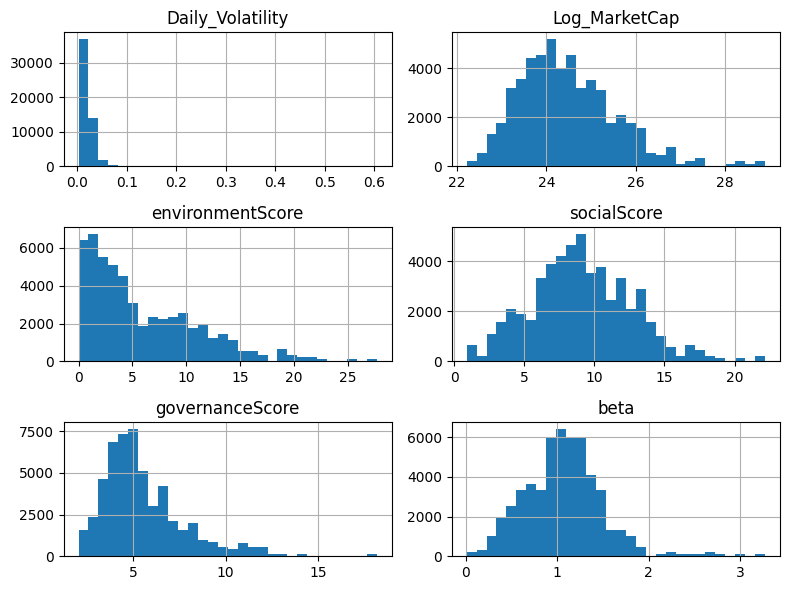

In [15]:
features = ['Daily_Volatility', 'Log_MarketCap'] # Only include existing features

# Check if the other features exist before trying to plot them
for feature in ['environmentScore', 'socialScore', 'governanceScore', 'beta']:
    if feature in data.columns:
        features.append(feature)
    else:
        print(f"Warning: Feature '{feature}' not found in the dataset.")

data[features].hist(figsize=(8,6), bins=30)
plt.tight_layout()
plt.show()

Sector-Based Feature Analysis:
Group features by GICS_Sector to see if certain industries align with Safe, Moderate, or Risky traits:

In [17]:
import seaborn as sns

                        Daily_Volatility  Log_MarketCap  environmentScore  \
GICS Sector                                                                 
Communication Services          0.022461      24.968096          1.705518   
Consumer Discretionary          0.021850      24.343068          4.836654   
Consumer Staples                0.018027      24.346761          9.316931   
Energy                          0.020411      24.606290         15.739585   
Financials                      0.018665      24.665942          1.662345   
Health Care                     0.021297      24.564558          2.026352   
Industrials                     0.019054      24.387556          7.654898   
Information Technology          0.023451      24.810955          4.270542   
Materials                       0.020838      23.906765         12.722710   
Real Estate                     0.019722      24.136223          4.109883   
Utilities                       0.019328      24.191085         11.652231   

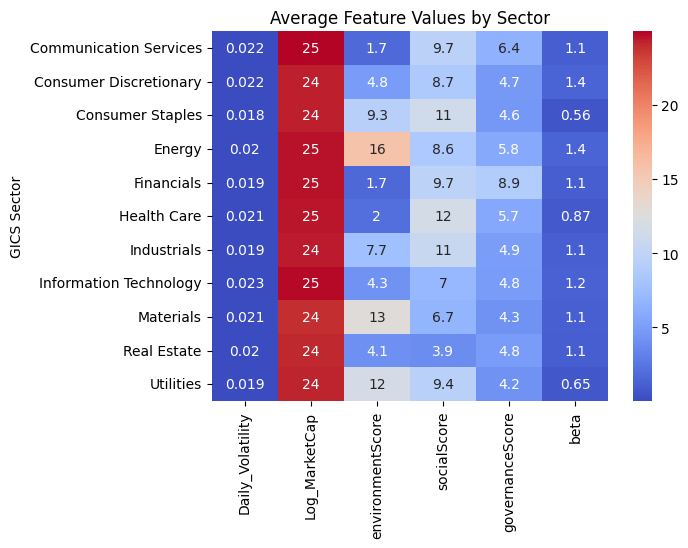

In [18]:
sector_stats = data.groupby('GICS Sector')[features].mean()
print(sector_stats)
sns.heatmap(sector_stats, annot=True, cmap='coolwarm')
plt.title('Average Feature Values by Sector')
plt.show()

Analyze Relationships Between Traits

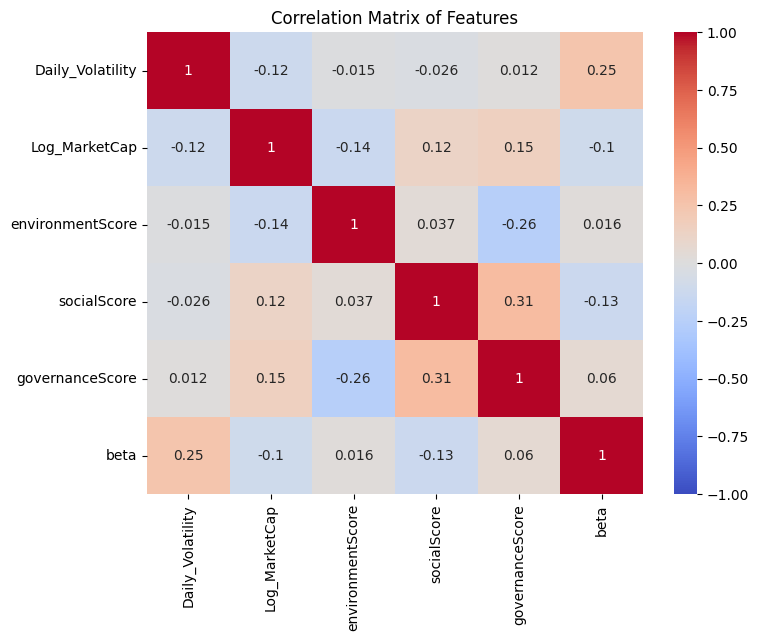

In [19]:
# correction matrix
corr_matrix = data[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [20]:
#Pair Plots for Key Traits:
#Visualize pairwise relationships for a subset of traits:

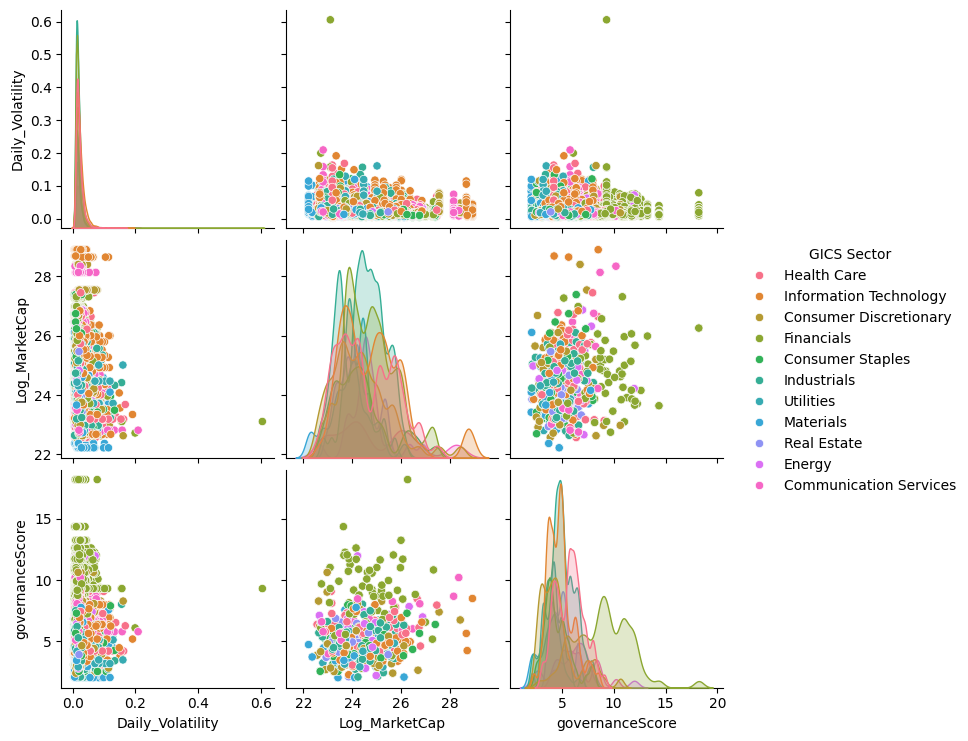

In [21]:
sns.pairplot(data[['Daily_Volatility', 'Log_MarketCap', 'governanceScore', 'GICS Sector']], hue='GICS Sector')
plt.show()

ESG vs. Volatility

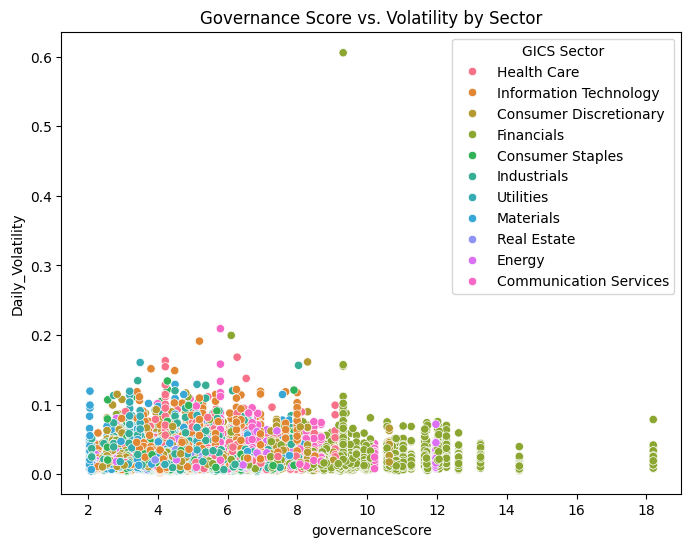

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='governanceScore', y='Daily_Volatility', hue='GICS Sector', data=data) # Changed 'Governancescore' to 'governanceScore'
plt.title('Governance Score vs. Volatility by Sector')
plt.show()

Why: Identifies which traits are most influential for clustering (e.g., volatility and MarketCap likely drive Risky vs. Safe) and confirms ESG’s role in differentiating clusters (e.g., Moderate’s high governance).